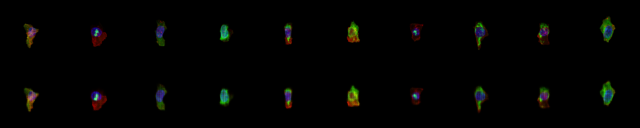

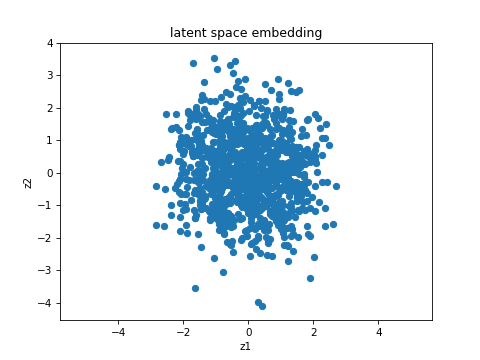

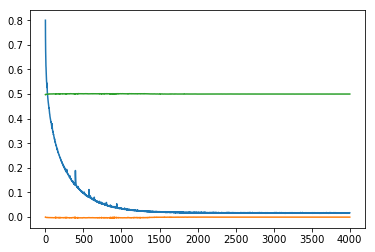

In [7]:
import SimpleLogger as SimpleLogger
import torch
from IPython.core.display import Image, display
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

model_dir = './waae/'

opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ) )
logger = pickle.load( open( '{0}/logger.pkl'.format(model_dir), "rb" ) )

plt.gca().cla() 
plt.plot(logger.log['iter'], logger.log['reconLoss'])
plt.plot(logger.log['iter'], logger.log['advLoss'])
plt.plot(logger.log['iter'], logger.log['minimaxLoss'])
plt.xlabel('iteration')

epoch = max(logger.log['epoch'])

im_progress_path = '{0}/progress_{1}.png'.format(model_dir, epoch)
display(Image(im_progress_path, unconfined=True))

im_embed_path = '{0}/embedding_{1}.png'.format(model_dir, epoch)
display(Image(im_embed_path,  unconfined=True))





# plt.xlim([-4, 4]) 
# plt.ylim([-4, 4])     
# plt.axis('equal')
# plt.xlabel('z_1')
# plt.ylabel('z_2')
# display.clear_output(wait=True)
# display.display(plt.gcf()) 
# img = Image.open(image_path)

In [9]:
logger.fields


('epoch', 'iter', 'reconLoss', 'minimaxLoss', 'advLoss', 'time')